In [1]:
import pandas as pd
from pandas import DatetimeIndex
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')
my_year_month_fmt = mdates.DateFormatter('%m/%y')
%matplotlib inline

In [2]:
bitcoin_df = pd.read_excel("./CRYPTOCURRENCY/BITCOIN.xlsx")
litecoin_df = pd.read_excel("./CRYPTOCURRENCY/LITECOIN.xlsx")
etherium_df = pd.read_excel("./CRYPTOCURRENCY/ETHEREUM.xlsx")

In [3]:
#create date as the dataframe index
bitcoin_df.index = DatetimeIndex(bitcoin_df['Date'])
etherium_df.index = DatetimeIndex(etherium_df['Date'])
litecoin_df.index = DatetimeIndex(litecoin_df['Date'])

In [4]:
#drop original date column
bitcoin_df.drop("Date",axis =1,inplace=True)
etherium_df.drop("Date",axis =1,inplace=True)
litecoin_df.drop("Date",axis =1,inplace=True)

In [5]:
bitcoin_df['HLC'] = (2*bitcoin_df.High + bitcoin_df.Low + bitcoin_df.Close)/4
etherium_df['HLC'] = (2*etherium_df.High+ etherium_df.Low+ etherium_df["Close**"])/4
litecoin_df['HLC'] = (2*litecoin_df.High + litecoin_df.Low + litecoin_df["Close**"])/4

In [6]:
data = litecoin_df.join(bitcoin_df, lsuffix='_litecoin', rsuffix='_bitcoin').join(etherium_df,rsuffix="_etherium")

In [7]:
profile_data = pd.DataFrame(data = [data.HLC_bitcoin,data.HLC_litecoin,data.HLC])
profile_data = profile_data.T

In [8]:
profile_data.rename(columns={"HLC_bitcoin":"Bitcoin","HLC_litecoin":"Litecoin","HLC":"Etherium"},inplace=True)

### Include data for dates when all three cryptocurrencies existed

In [14]:
profile_data.drop(profile_data[profile_data['Etherium'].isnull()].index,inplace=True)
profile_data.head()

,Bitcoin,Litecoin,Etherium
Date,,,
2015-08-07,279.1850,4.1550,3.092500
2015-08-08,270.3925,4.0325,1.767012
2015-08-09,264.8875,3.9175,0.772677
2015-08-10,265.2825,3.9525,0.701175
2015-08-11,268.8150,4.1050,0.998309


In [15]:
# Calculating the short-window simple moving average
short_rolling = profile_data.rolling(window=7).mean()
short_rolling.tail()

,Bitcoin,Litecoin,Etherium
Date,,,
2018-09-09,6791.625714,60.163571,243.158929
2018-09-10,6658.351786,58.668929,229.678571
2018-09-11,6514.981429,56.601429,215.733929
2018-09-12,6407.199643,54.852500,204.440714
2018-09-13,6389.278214,54.401071,201.268214


In [16]:
# Calculating the long-window simple moving average
long_rolling = profile_data.rolling(window=21).mean()
long_rolling.tail()

,Bitcoin,Litecoin,Etherium
Date,,,
2018-09-09,6810.516786,59.908929,271.409524
2018-09-10,6806.851548,59.851310,267.050595
2018-09-11,6801.976667,59.723810,262.711071
2018-09-12,6790.360357,59.443214,257.871190
2018-09-13,6789.682619,59.310476,254.487143


In [17]:
def plotSMA(crypto_type,start_date,end_date):
    start_date = profile_data.index.min()
    end_date = profile_data.index.max()

    fig, ax = plt.subplots(figsize=(16,9))

    ax.plot(profile_data.loc[start_date:end_date, :].index, profile_data.loc[start_date:end_date, crypto_type], label='Price')
    ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, crypto_type], label = '21-days SMA')
    ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, crypto_type], label = '7-days SMA')

    ax.legend(loc='best')
    ax.set_ylabel(crypto_type +' Price in $')
    ax.xaxis.set_major_formatter(my_year_month_fmt)


### Bitcoin Moving Average

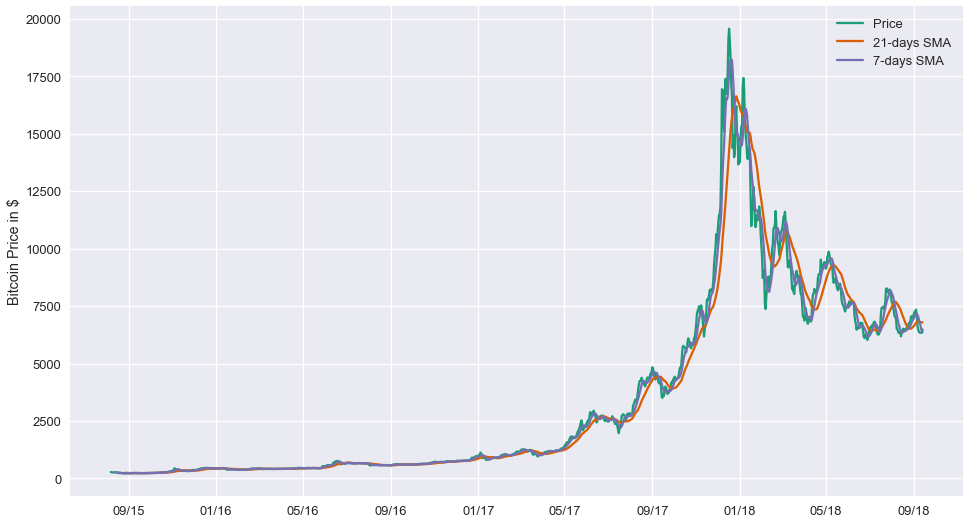

In [18]:
plotSMA(crypto_type="Bitcoin",start_date=profile_data.index.min(),end_date=profile_data.index.min())

### Litecoin Moving Average

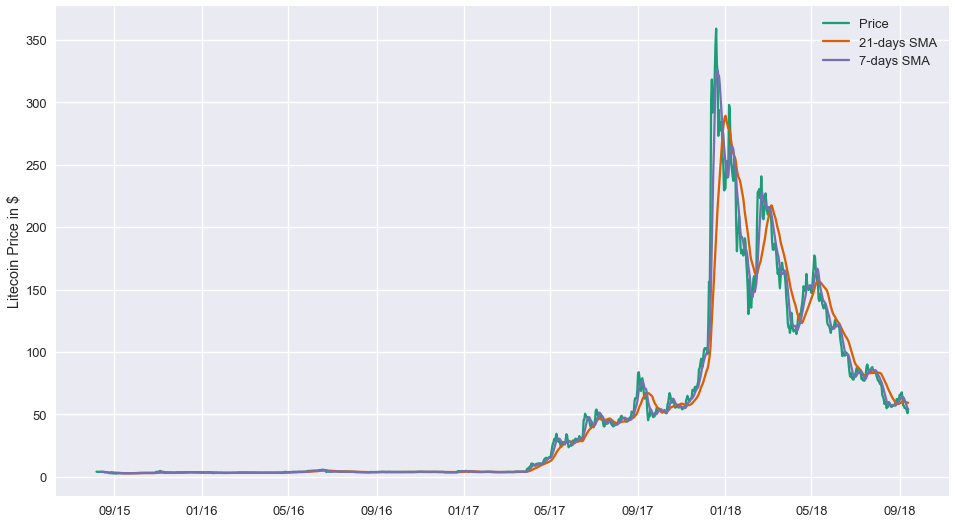

In [19]:
plotSMA(crypto_type="Litecoin",start_date=profile_data.index.min(),end_date=profile_data.index.min())

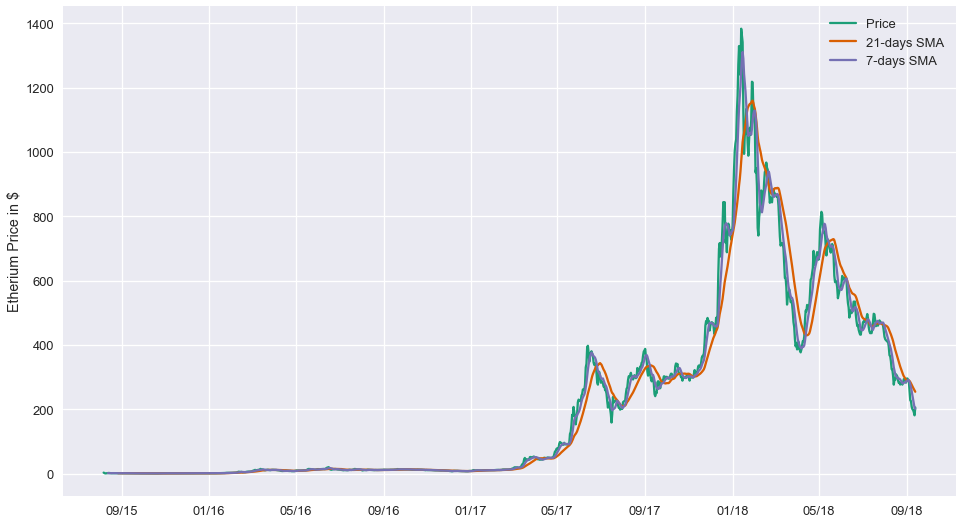

In [20]:
plotSMA(crypto_type="Etherium",start_date=profile_data.index.min(),end_date=profile_data.index.min())


### SMA timeseries are much less noisy than the original price timeseries.
### However, SMA timeseries lag the original price timeseries, which means that changes in the trend are only seen with a delay (lag) of L days. Where L depends on the number of days considered for moving averge.

#### In our case the lag is about 10 days, for 20 days SMA & 50 days for the 100 days SMA

### To solve this problem, we introduce a concept of Exponential Moving Averge.
####  $$  EMA(t_0)=(1−α)EMA(t−1)+α p(t)=p(t_0) $$


where p(t) is the price at time t and α is called the decay parameter for the EMA. α is related to the lag as


$$α=\frac{1}{L+1}$$


In [21]:
profile_data.index.min()

Timestamp('2015-08-07 00:00:00')

### Comparing Simple Moving Average & Exponential Moving Average for the last year

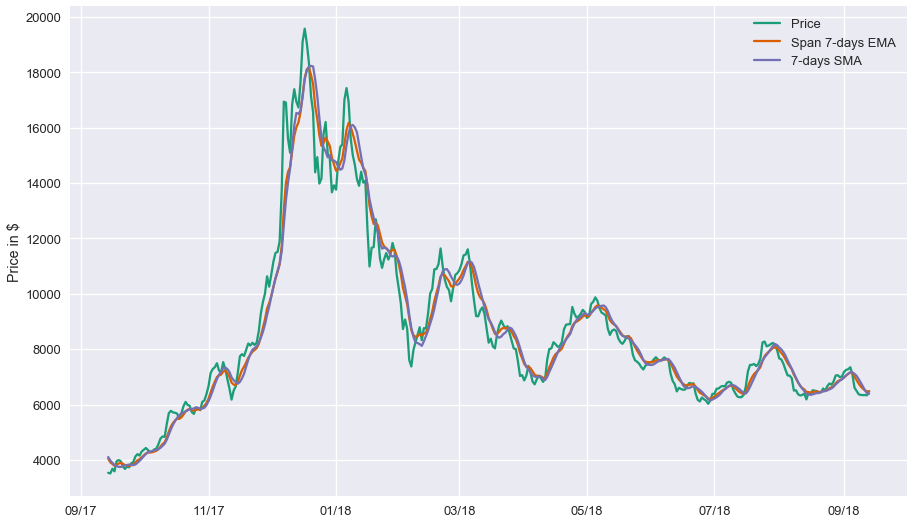

In [30]:
ema_short = profile_data.ewm(span=7, adjust=False).mean()
start_date = profile_data.tail(365).index.min()
end_date = profile_data.tail(365).index.max()
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(profile_data.loc[start_date:end_date, :].index, profile_data.loc[start_date:end_date, 'Bitcoin'], label='Price')
ax.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[start_date:end_date, 'Bitcoin'], label = 'Span 7-days EMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'Bitcoin'], label = '7-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')
ax.xaxis.set_major_formatter(my_year_month_fmt)

In [31]:
# Taking the difference between the prices and the EMA timeseries
trading_positions_raw = profile_data - ema_short
trading_positions_raw.tail()

,Bitcoin,Litecoin,Etherium
Date,,,
2018-09-09,-305.339834,-3.401460,-34.057408
2018-09-10,-233.163625,-2.588595,-27.446181
2018-09-11,-173.592094,-3.297071,-25.784011
2018-09-12,-136.685320,-4.134054,-26.448008
2018-09-13,9.562260,-0.803665,-1.412256


### We are again splitting our funds equally into 3 currencies

In [32]:
# Taking the sign of the difference to determine whether the price or the EMA is greater and then multiplying by 1/3
trading_positions = trading_positions_raw.apply(np.sign) * 1/3
trading_positions.tail()

,Bitcoin,Litecoin,Etherium
Date,,,
2018-09-09,-0.333333,-0.333333,-0.333333
2018-09-10,-0.333333,-0.333333,-0.333333
2018-09-11,-0.333333,-0.333333,-0.333333
2018-09-12,-0.333333,-0.333333,-0.333333
2018-09-13,0.333333,-0.333333,-0.333333


In [38]:
trading_positions_final.head()

,Bitcoin,Litecoin,Etherium
Date,,,
2015-08-07,NaN,NaN,NaN
2015-08-08,0.000000,0.000000,0.000000
2015-08-09,-0.333333,-0.333333,-0.333333
2015-08-10,-0.333333,-0.333333,-0.333333
2015-08-11,-0.333333,-0.333333,-0.333333


In [33]:
# Lagging our trading signals by one day.
trading_positions_final = trading_positions.shift(1)

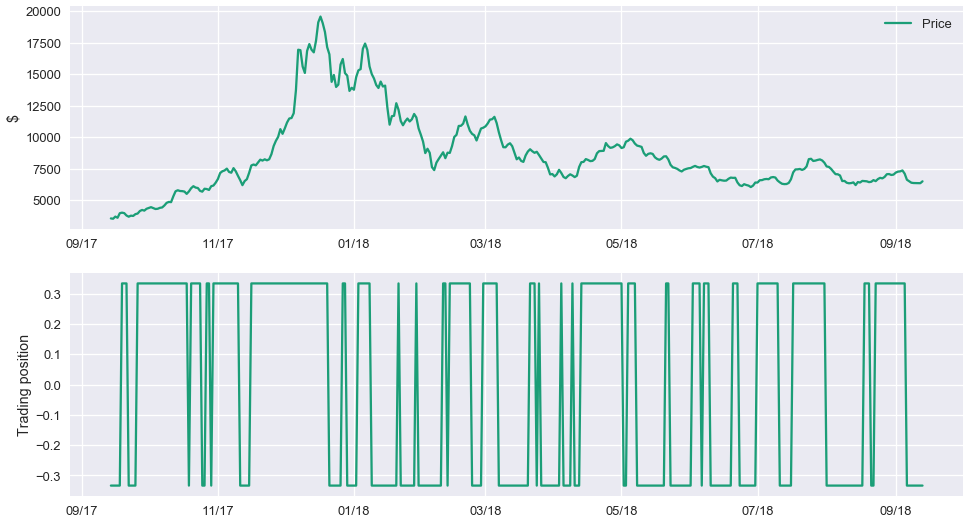

In [58]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9))

ax1.plot(profile_data.loc[start_date:end_date, :].index, profile_data.loc[start_date:end_date, 'Bitcoin'], label='Price')
# ax1.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[start_date:end_date, 'Bitcoin'], label = 'Span 7-days EMA')

ax1.set_ylabel('$')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)

ax2.plot(trading_positions_final.loc[start_date:end_date, :].index, trading_positions_final.loc[start_date:end_date, 'Bitcoin'], 
        label='Trading position')



ax2.set_ylabel('Trading position')
ax2.xaxis.set_major_formatter(my_year_month_fmt)

#### Calculating Log returns for the profile

In [140]:
# Log returns - First the logarithm of the prices is taken and the the difference of consecutive (log) observations
asset_log_returns = np.log(profile_data).diff()
asset_log_returns.tail()

,Bitcoin,Litecoin,Etherium
Date,,,
2018-09-09,-0.003828,-0.002718,-0.038448
2018-09-10,-0.000874,-0.000908,-0.012760
2018-09-11,0.000269,-0.033379,-0.035713
2018-09-12,-0.001365,-0.042484,-0.050997
2018-09-13,0.023311,0.058274,0.127138


#### Log returns if our startergy is used 

In [141]:
strategy_asset_log_returns = trading_positions_final * asset_log_returns
strategy_asset_log_returns.tail()

,Bitcoin,Litecoin,Etherium
Date,,,
2018-09-09,0.001276,0.000906,0.012816
2018-09-10,0.000291,0.000303,0.004253
2018-09-11,-0.000090,0.011126,0.011904
2018-09-12,0.000455,0.014161,0.016999
2018-09-13,-0.007770,-0.019425,-0.042379


### Cumilative Log returns

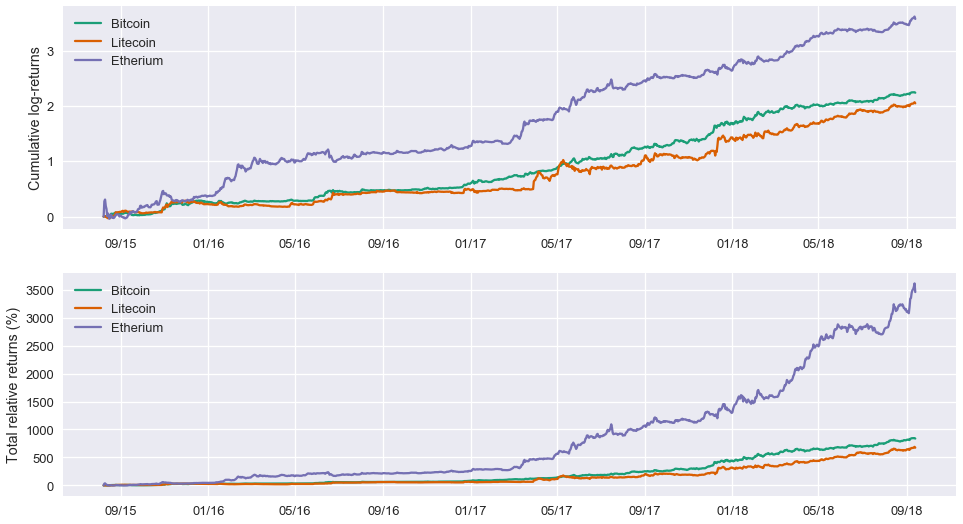

In [142]:
# Get the cumulative log-returns per asset
cum_strategy_asset_log_returns = strategy_asset_log_returns.cumsum()

# Transform the cumulative log returns to relative returns
cum_strategy_asset_relative_returns = np.exp(cum_strategy_asset_log_returns) - 1

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9))

for c in asset_log_returns:
    ax1.plot(cum_strategy_asset_log_returns.index, cum_strategy_asset_log_returns[c], label=str(c))

ax1.set_ylabel('Cumulative log-returns')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)

for c in asset_log_returns:
    ax2.plot(cum_strategy_asset_relative_returns.index, 100*cum_strategy_asset_relative_returns[c], label=str(c))

ax2.set_ylabel('Total relative returns (%)')
ax2.legend(loc='best')
ax2.xaxis.set_major_formatter(my_year_month_fmt)

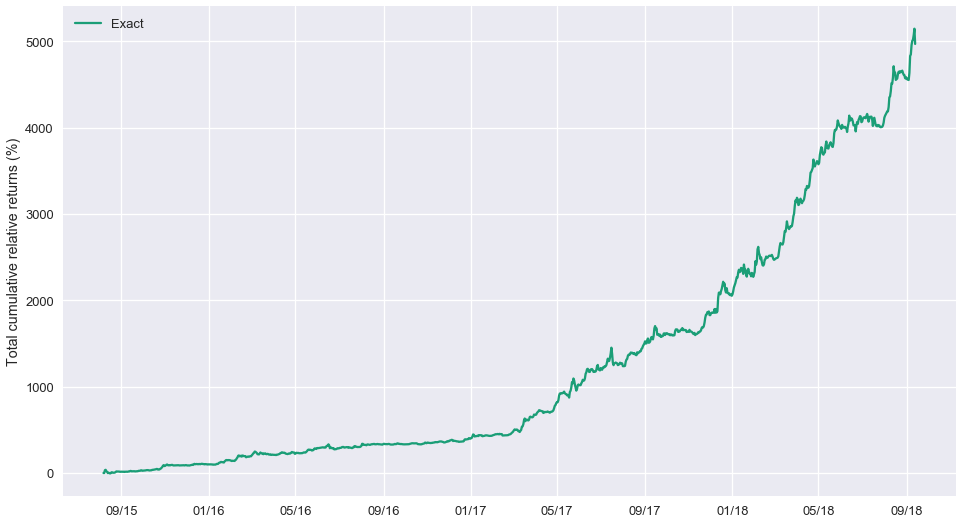

In [143]:
# Total strategy relative returns. This is the exact calculation.
cum_relative_return_exact = cum_strategy_asset_relative_returns.sum(axis=1)

# Get the cumulative log-returns per asset
cum_strategy_log_return = cum_strategy_asset_log_returns.sum(axis=1)

# Transform the cumulative log returns to relative returns. This is the approximation
cum_relative_return_approx = np.exp(cum_strategy_log_return) - 1

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(cum_relative_return_exact.index, 100*cum_relative_return_exact, label='Exact')

ax.set_ylabel('Total cumulative relative returns (%)')
ax.legend(loc='best')
ax.xaxis.set_major_formatter(my_year_month_fmt)

In [144]:
def print_portfolio_yearly_statistics(portfolio_cumulative_relative_returns, days_per_year = 365):
    total_days_in_simulation = portfolio_cumulative_relative_returns.shape[0]
    number_of_years = total_days_in_simulation / days_per_year

    # The last data point will give us the total portfolio return
    total_portfolio_return = portfolio_cumulative_relative_returns[-1]
    # Average portfolio return assuming compunding of returns
    average_yearly_return = (1 + total_portfolio_return)**(1/number_of_years) - 1

    print('Total portfolio return is: ' + '{:5.2f}'.format(100*total_portfolio_return) + '%')
    print('Average yearly return is: ' + '{:5.2f}'.format(100*average_yearly_return) + '%')

print_portfolio_yearly_statistics(cum_relative_return_exact)

Total portfolio return is: 4970.48%
Average yearly return is: 253.84%


### MACD
#### We tried using a long EMA of span 26 days and short EMA of 12 days. The Signal Crossover is then calculate for a span of 9 Days


Signal line crossovers are the most common MACD signals. The signal line is a 9-day EMA of the MACD Line. As a moving average of the indicator, it trails the MACD and makes it easier to spot MACD turns. A bullish crossover occurs when the MACD turns up and crosses above the signal line. A bearish crossover occurs when the MACD turns down and crosses below the signal line. Crossovers can last a few days or a few weeks, it all depends on the strength of the move.

In [72]:
long_ema = profile_data.ewm(span = 26, adjust=False).mean()
short_ema = profile_data.ewm(span = 12, adjust=False).mean()
MACD_DF = short_ema-long_ema

In [73]:
# Compute the 9 Day Exponential Moving Average of MACD.
Signal_df = MACD_DF.ewm(span = 9, adjust = False).mean()

In [76]:
# Create Signal Line Crossover Indicator. When MACD > Signal Line, 1. When MACD < Signal Line, 0.
signal_crossover_df = pd.DataFrame(np.where(MACD_DF>Signal_df,1,0),index=Signal_df.index)
signal_crossover_df = pd.DataFrame(np.where(MACD_DF<Signal_df,-1,signal_crossover_df),index=Signal_df.index,columns=profile_data.columns)

A bullish centerline crossover occurs when the MACD Line moves above the zero line to turn positive. This happens when the 12-day EMA of the currency moves above the 26-day EMA. A bearish centerline crossover occurs when the MACD moves below the zero line to turn negative. This happens when the 12-day EMA moves below the 26-day EMA.

In [77]:
#Create Centerline Crossover Indicator. When MACD > 0, 1. When MACD < 0, 0.
crossover_df = pd.DataFrame(np.where(MACD_DF > 0, 1, 0),index=Signal_df.index)
crossover_df = pd.DataFrame(np.where(MACD_DF < 0, -1, crossover_df),index=Signal_df.index,columns=profile_data.columns)


In [78]:
buy_sell_df = (2*(np.sign(signal_crossover_df - signal_crossover_df.shift(1))))

C:\Users\ravi7\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sign
  """Entry point for launching an IPython kernel.


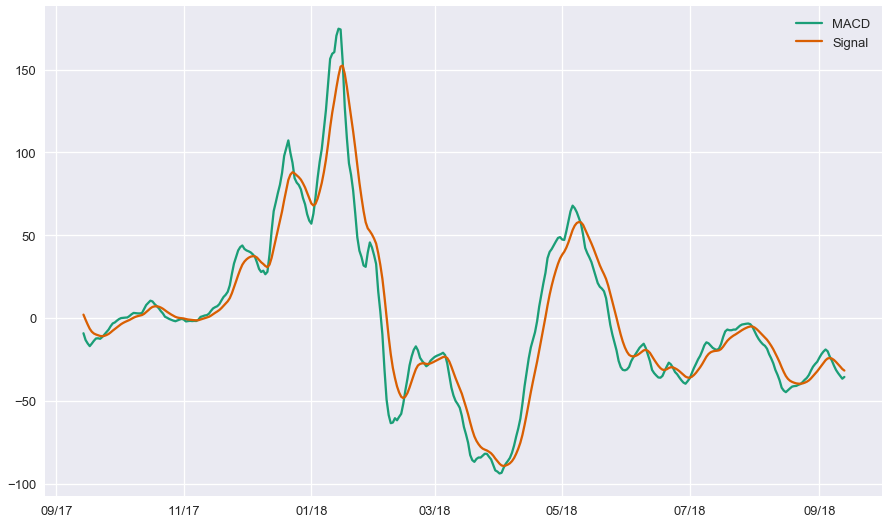

In [116]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(MACD_DF.loc[start_date:end_date, :].index, MACD_DF.loc[start_date:end_date, 'Etherium'], label = 'MACD')
ax.plot(Signal_df.loc[start_date:end_date, :].index, Signal_df.loc[start_date:end_date, 'Etherium'], label = 'Signal')
# ax.plot(profile_data.loc[start_date:end_date, :].index,profile_data.loc[start_date:end_date, 'Bitcoin'], label = 'Price')
ax.legend(loc='best')

ax.xaxis.set_major_formatter(my_year_month_fmt)

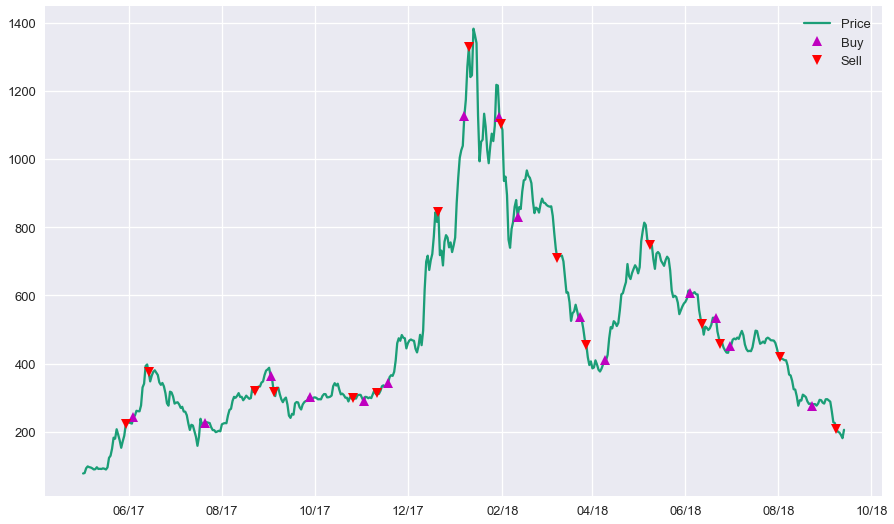

In [118]:
fig, ax = plt.subplots(figsize=(15,9))
buy_sell_temp_df =buy_sell_df.shift(1)
profile_temp = profile_data.tail(500)['Etherium']
ax.plot(profile_temp.index, profile_temp, label='Price')
# ax.plot(crossover_df.loc["2018-01-01":end_date, :].index, crossover_df.loc["2018-01-01":end_date, 'Bitcoin'], label = 'Centre line crossover',color='blue')
# ax.plot(buy_sell_df.loc["2018-01-01":end_date, :].index, buy_sell_df.loc["2018-01-01":end_date, 'Bitcoin'], label = 'buy_sell')
# # Plot the buy signals
ax.plot(profile_temp.loc[buy_sell_temp_df.Bitcoin == 2.0].index, 
        profile_temp[buy_sell_temp_df.Bitcoin == 2.0],'^', markersize=10, color='m',label="Buy")
ax.plot(profile_temp.loc[buy_sell_temp_df.Bitcoin == -2.0].index, 
         profile_temp[buy_sell_temp_df.Bitcoin == -2.0],'v', markersize=10, color='r',label="Sell")
ax.legend(loc='best')

ax.xaxis.set_major_formatter(my_year_month_fmt)

In [132]:
strategy_asset_log_returns_macd = buy_sell_df.shift(1)/2 * asset_log_returns
strategy_asset_log_returns_macd.tail()

,Bitcoin,Litecoin,Etherium
Date,,,
2018-09-09,-0.0,0.002718,-0.0
2018-09-10,-0.0,-0.000000,-0.0
2018-09-11,0.0,-0.000000,-0.0
2018-09-12,-0.0,-0.000000,-0.0
2018-09-13,0.0,0.000000,0.0


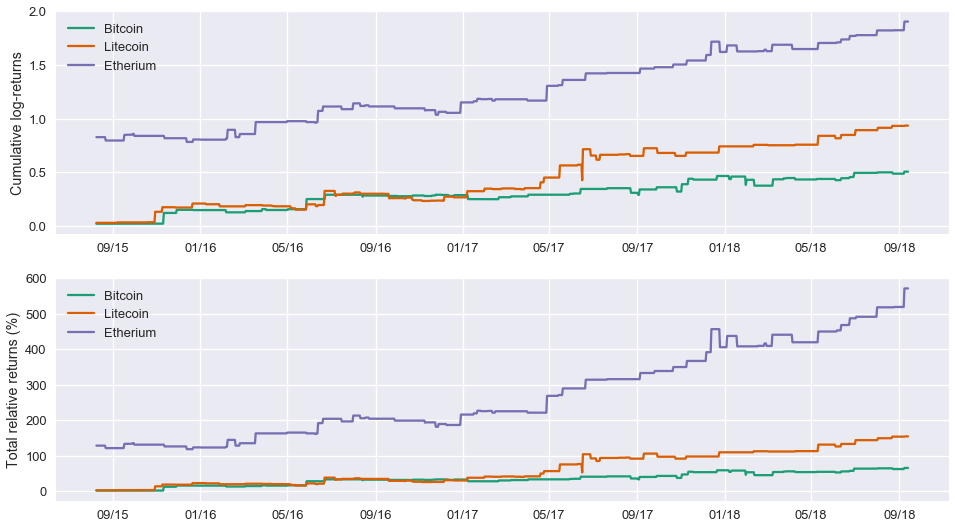

In [133]:
# Get the cumulative log-returns per asset
cum_strategy_asset_log_returns = strategy_asset_log_returns_macd.cumsum()

# Transform the cumulative log returns to relative returns
cum_strategy_asset_relative_returns = np.exp(cum_strategy_asset_log_returns) - 1

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9))

for c in asset_log_returns:
    ax1.plot(cum_strategy_asset_log_returns.index, cum_strategy_asset_log_returns[c], label=str(c))

ax1.set_ylabel('Cumulative log-returns')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)

for c in asset_log_returns:
    ax2.plot(cum_strategy_asset_relative_returns.index, 100*cum_strategy_asset_relative_returns[c], label=str(c))

ax2.set_ylabel('Total relative returns (%)')
ax2.legend(loc='best')
ax2.xaxis.set_major_formatter(my_year_month_fmt)

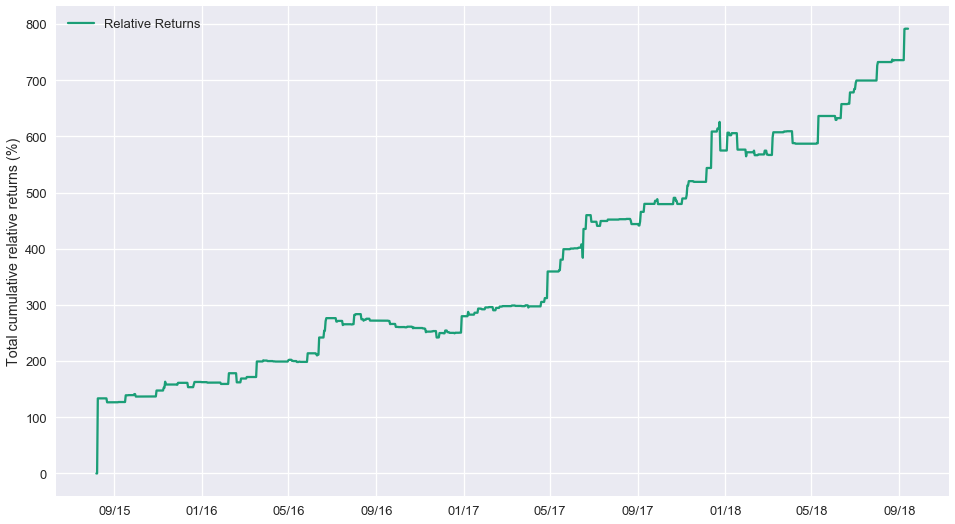

In [134]:
# Total strategy relative returns. This is the exact calculation.
cum_relative_return_exact = cum_strategy_asset_relative_returns.sum(axis=1)

# Get the cumulative log-returns per asset
cum_strategy_log_return = cum_strategy_asset_log_returns.sum(axis=1)

# Transform the cumulative log returns to relative returns. This is the approximation
cum_relative_return_approx = np.exp(cum_strategy_log_return) - 1

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(cum_relative_return_exact.index, 100*cum_relative_return_exact, label='Relative Returns')

ax.set_ylabel('Total cumulative relative returns (%)')
ax.legend(loc='best')
ax.xaxis.set_major_formatter(my_year_month_fmt)

In [135]:
print_portfolio_yearly_statistics(cum_relative_return_exact)

Total portfolio return is: 791.94%
Average yearly return is: 102.25%


### Sharpe Ratio

In [139]:
# Isolate the returns of your strategy
returns = cum_strategy_asset_relative_returns.pct_change()

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(365) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

Bitcoin     0.794427
Litecoin    1.093619
Etherium    1.627659
dtype: float64
